<a href="https://colab.research.google.com/github/KhalilAliKain/Datathon1/blob/main/Datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all necessary packages
from google.colab import files
import pandas as pd
import io
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from statsmodels.miscmodels.ordinal_model import OrderedModel

import warnings
warnings.filterwarnings("ignore")

In [ ]:
uploaded = files.upload()
df_BMI = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon #1-Dataset1.csv']))
df_BMI.head()

Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [ ]:
uploaded = files.upload()
df_lung = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon#1-Dataset2.csv']))
df_lung.head()

Saving CHL5230-F23-Datathon#1-Dataset2.csv to CHL5230-F23-Datathon#1-Dataset2.csv


,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


**BMI DATASET ANALYSIS**

DESCRIPTIVES AND ASSOCIATION BETWEEN CALORIE INTAKE AND BMI

In [ ]:
#Importing dataset, here we import this dataset one more time to avoid some changes
# that may happens when other team member modified the dataset.
uploaded = files.upload()

Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1 (1).csv


In [ ]:
df = pd.read_csv('CHL5230-F23-Datathon #1-Dataset1.csv')
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [ ]:
#Hide columns not needed for univariable analysis
df.drop('Sugar_Intake', axis=1, inplace=True)
df.drop('Physical_Activity', axis=1, inplace=True)
df.drop('Fast_Food_Frequency', axis=1, inplace=True)
df.drop('Screen_Time', axis=1, inplace=True)
df.drop('Height', axis=1, inplace=True)
df.drop('Weight', axis=1, inplace=True)
df

,Age,Gender,Calorie_Intake,BMI
0,56,Female,3091,32.981343
1,69,Female,2090,27.973877
2,46,Male,2938,26.640417
3,32,Female,3022,42.813720
4,60,Female,2350,28.810685
...,...,...,...,...
23530,51,Female,2858,18.075460
23531,20,Female,2573,20.362283
23532,26,Female,2246,29.109537
23533,22,Male,1588,17.433880


In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

Age               0
Gender            0
Calorie_Intake    0
BMI               0
dtype: int64


In [ ]:
# Display summary statistics
print(df.describe())

                Age  Calorie_Intake           BMI
count  23535.000000    23535.000000  23535.000000
mean      48.532993     2495.845634     26.127641
std       17.872736      577.798752      6.875510
min       18.000000     1500.000000      3.442184
25%       33.000000     1991.000000     21.337576
50%       48.000000     2495.000000     25.661507
75%       64.000000     2994.000000     30.329032
max       79.000000     3499.000000     70.475419


In [ ]:
#Descriptives (counts) for gender
print(df['Gender'].value_counts()['Female'])
print(df['Gender'].value_counts()['Male'])

14896
8639


In [ ]:
#Create subset of data by gender for analysis

#Subset by male gender
Male_rows = df[df['Gender'] == 'Male']
Male_rows.head()

,Age,Gender,Calorie_Intake,BMI
2,46,Male,2938,26.640417
5,25,Male,1939,22.713344
6,78,Male,3156,20.013738
7,38,Male,2213,21.125011
8,56,Male,1931,17.018513


In [ ]:
# Descriptives for male subset
print(Male_rows.describe())

               Age  Calorie_Intake          BMI
count  8639.000000     8639.000000  8639.000000
mean     48.385693     2500.548559    26.113739
std      17.795606      575.686427     6.776816
min      18.000000     1500.000000     7.168653
25%      33.000000     2003.000000    21.335067
50%      48.000000     2506.000000    25.669761
75%      64.000000     2992.000000    30.356465
max      79.000000     3499.000000    59.257116


In [ ]:
#Subset by female gender
Female_rows = df[df['Gender'] == 'Female']
Female_rows.head()

,Age,Gender,Calorie_Intake,BMI
0,56,Female,3091,32.981343
1,69,Female,2090,27.973877
3,32,Female,3022,42.813720
4,60,Female,2350,28.810685
9,75,Female,2447,23.763338


In [ ]:
#Descriptives for female gender
print(Female_rows.describe())

                Age  Calorie_Intake           BMI
count  14896.000000    14896.000000  14896.000000
mean      48.618421     2493.118153     26.135703
std       17.917357      579.022068      6.932318
min       18.000000     1500.000000      3.442184
25%       33.000000     1986.750000     21.342300
50%       48.000000     2489.000000     25.656346
75%       64.000000     2994.000000     30.313241
max       79.000000     3499.000000     70.475419


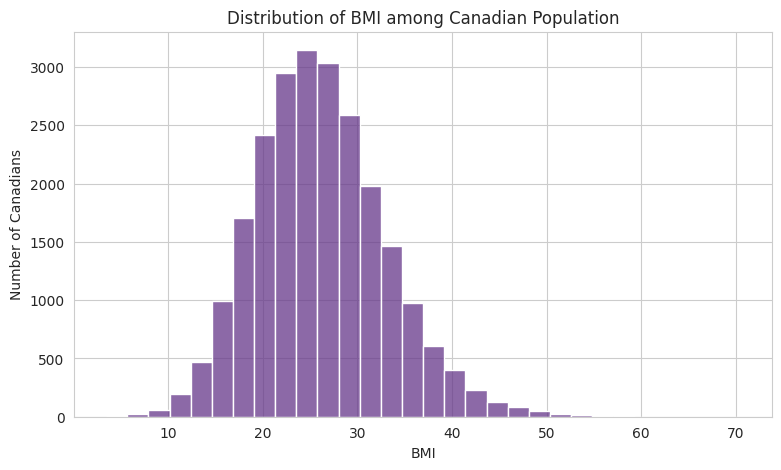

In [ ]:
#Display distribution of BMI
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'BMI'
plt.figure(figsize=(9, 5))
sns.histplot(df['BMI'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of BMI among Canadian Population')
plt.xlabel('BMI')
plt.ylabel('Number of Canadians')
plt.show()

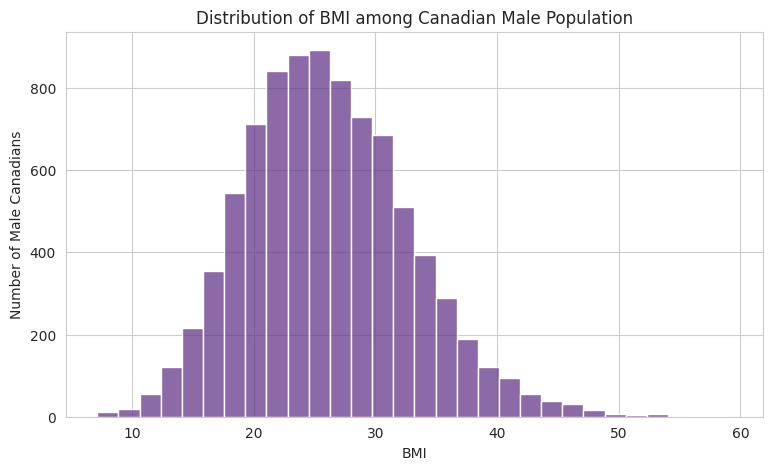

In [ ]:
#Distribution of BMI for male population
# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'BMI' feature
plt.figure(figsize=(9, 5))
sns.histplot(Male_rows['BMI'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of BMI among Canadian Male Population')
plt.xlabel('BMI')
plt.ylabel('Number of Male Canadians')
plt.show()

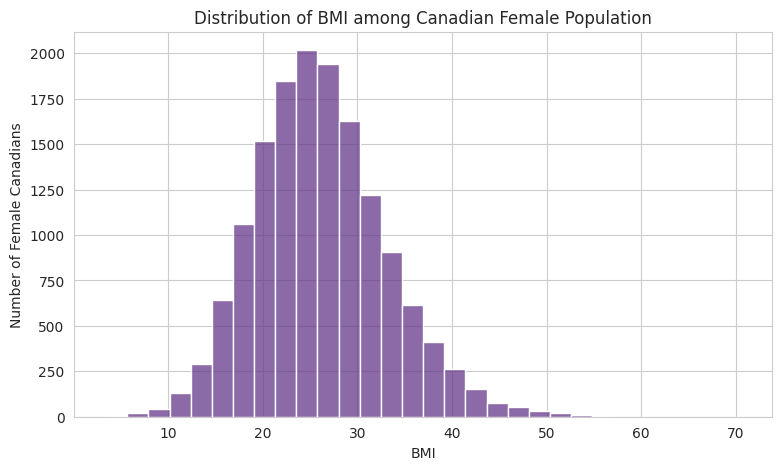

In [ ]:
#Distirbution of BMI for female population
# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'BMI' feature
plt.figure(figsize=(9, 5))
sns.histplot(Female_rows['BMI'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of BMI among Canadian Female Population')
plt.xlabel('BMI')
plt.ylabel('Number of Female Canadians')
plt.show()

In [ ]:
#Categorical classification of BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Healthy Weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obesity"


df['BMI'] = df['BMI'].apply(categorize_bmi)
df.head()

,Age,Gender,Calorie_Intake,BMI
0,56,Female,3091,Obesity
1,69,Female,2090,Overweight
2,46,Male,2938,Overweight
3,32,Female,3022,Obesity
4,60,Female,2350,Overweight


In [ ]:
#Univariable nalysis for male population
Male_rows = df[df['Gender'] == 'Male']
Male_rows.head()

,Age,Gender,Calorie_Intake,BMI
2,46,Male,2938,Overweight
5,25,Male,1939,Healthy Weight
6,78,Male,3156,Healthy Weight
7,38,Male,2213,Healthy Weight
8,56,Male,1931,Underweight


In [ ]:
#Categorical classification for male caloric intake
def categorize_calorie_intake(calorie_intake):
    if calorie_intake < 2500:
        return "Below Recommended"
    else:
        return "Recommended and Above"


Male_rows['Daily Calorie Intake'] = Male_rows['Calorie_Intake'].apply(categorize_calorie_intake)
Male_rows.head()

,Age,Gender,Calorie_Intake,BMI,Daily Calorie Intake
2,46,Male,2938,Overweight,Recommended and Above
5,25,Male,1939,Healthy Weight,Below Recommended
6,78,Male,3156,Healthy Weight,Recommended and Above
7,38,Male,2213,Healthy Weight,Below Recommended
8,56,Male,1931,Underweight,Below Recommended


In [ ]:
#Contingency table for male population
contingencymale= pd.crosstab(Male_rows['BMI'], Male_rows['Daily Calorie Intake'])
contingencymale

Daily Calorie Intake,Below Recommended,Recommended and Above
BMI,,
Healthy Weight,1496,1451
Obesity,1140,1184
Overweight,1150,1163
Underweight,506,549


<Axes: xlabel='Daily Calorie Intake', ylabel='BMI'>

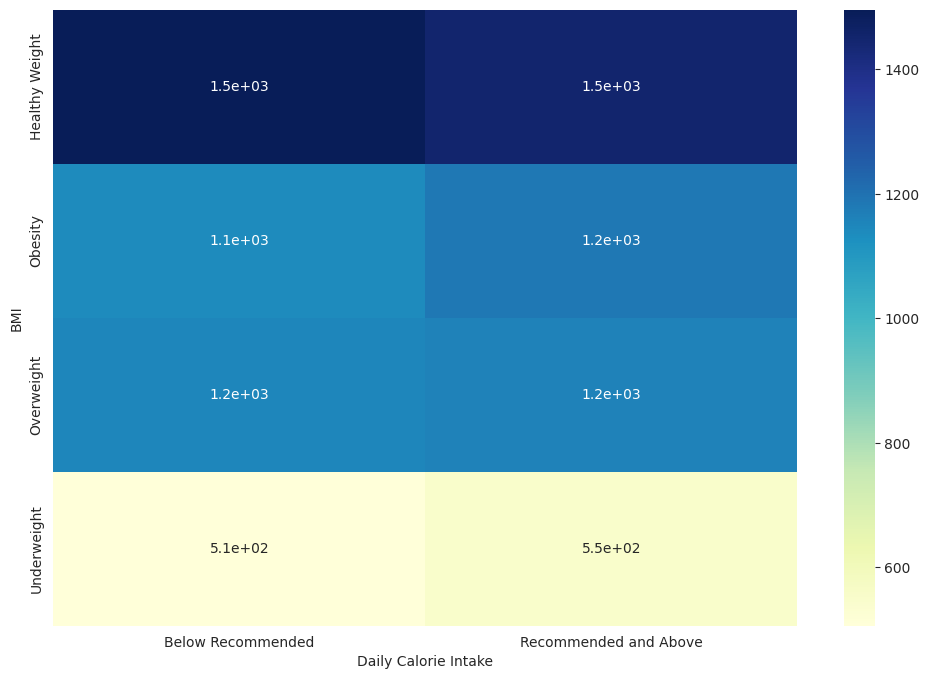

In [ ]:
#Heat map for male population
plt.figure(figsize=(12,8))
sns.heatmap(contingencymale, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-squared test of independence for male population
c, p, dof, expected = chi2_contingency(contingencymale)
# Print the p-value
print(p)

0.3922696340313857


<Axes: xlabel='BMI'>

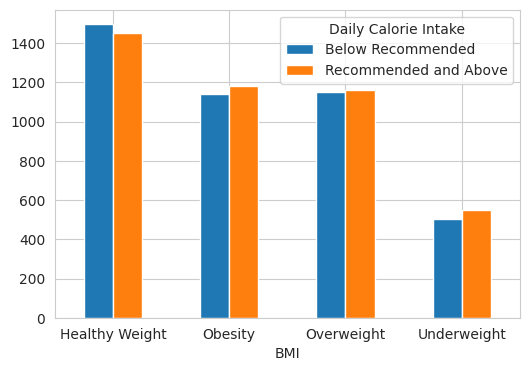

In [ ]:
#Bar graph for male population
contingencymale.plot.bar(figsize=(6,4), rot=0)

In [ ]:
#Univariable analysis for female population
Female_rows = df[df['Gender'] == 'Female']
Female_rows.head()

,Age,Gender,Calorie_Intake,BMI
0,56,Female,3091,Obesity
1,69,Female,2090,Overweight
3,32,Female,3022,Obesity
4,60,Female,2350,Overweight
9,75,Female,2447,Healthy Weight


In [ ]:
#Categorical classification for female caloric intake
def categorize_calorie_intake(calorie_intake):
    if calorie_intake < 2000:
        return "Below Recommended"
    else:
        return "Recommended and Above"


Female_rows['Daily Calorie Intake'] = Female_rows['Calorie_Intake'].apply(categorize_calorie_intake)
Female_rows.head()

,Age,Gender,Calorie_Intake,BMI,Daily Calorie Intake
0,56,Female,3091,Obesity,Recommended and Above
1,69,Female,2090,Overweight,Recommended and Above
3,32,Female,3022,Obesity,Recommended and Above
4,60,Female,2350,Overweight,Recommended and Above
9,75,Female,2447,Healthy Weight,Recommended and Above


In [ ]:
#Contingency table for female population
contingencyfemale= pd.crosstab(Female_rows['BMI'], Female_rows['Daily Calorie Intake'])
contingencyfemale

Daily Calorie Intake,Below Recommended,Recommended and Above
BMI,,
Healthy Weight,1285,3690
Obesity,973,2959
Overweight,1078,3053
Underweight,474,1384


<Axes: xlabel='Daily Calorie Intake', ylabel='BMI'>

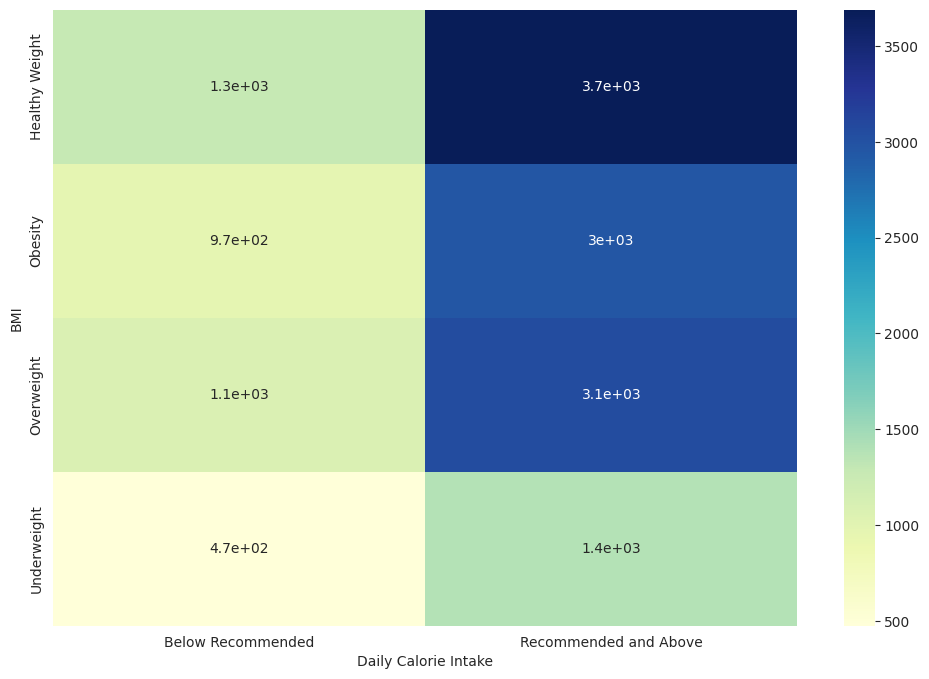

In [ ]:
#Heat map for female population
plt.figure(figsize=(12,8))
sns.heatmap(contingencyfemale, annot=True, cmap="YlGnBu")

In [ ]:
#Chi-squared test of independence for female population
c, p, dof, expected = chi2_contingency(contingencyfemale)
# Print the p-value
print(p)

0.5356830523706133


<Axes: xlabel='BMI'>

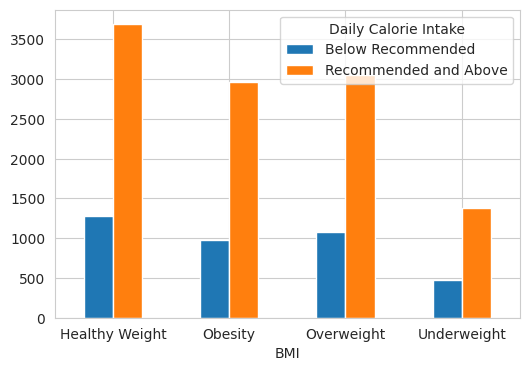

In [ ]:
#Bar graph for female population
contingencyfemale.plot.bar(figsize=(6,4), rot=0)

In [ ]:
### Public Health Factors Influencing BMI
# Here, we want to focus on the factors that influence BMI, by using the machine
# learning techniques such as K-NN for classification and clustering, but BMI is
# a continuous variable, so we have to transform it to categorical data.
df_BMI.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [ ]:
# Display basic descriptive statistics
print(df_BMI.describe())
# Check for missing values in the dataset, no missing value is found here.
print(df_BMI.isna().sum())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

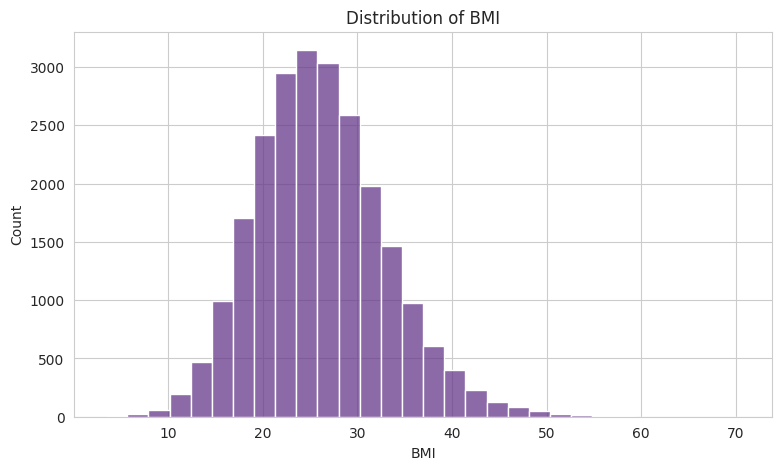

In [ ]:
# First, check the distribution of BMI
# Follow a normal distribution
# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(df_BMI['BMI'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.show()

In [ ]:
# According to WHO BMI standard, we can cluster it into 4 different groups.
# Below 18.5 Underweight
# 18.5—24.9	Healthy Weight
# 25.0—29.9	Overweight
# 30.0 and Above	Obesity

# create a helper fucntion
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Healthy Weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obesity"


df_BMI['bmi_group'] = df_BMI['BMI'].apply(categorize_bmi)
df_BMI.head()
# Now, we have the label that we can apply when we use KNN

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,bmi_group
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343,Obesity
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877,Overweight
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417,Overweight
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720,Obesity
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685,Overweight


In [ ]:
# We also need to make sure that rest of the data are numeric, convert Gender
# into a format that can be utilized by machine learning algorithms (0 or 1)
# Encoding 'Gender' column
le = LabelEncoder()
df_BMI['Gender'] = le.fit_transform(df_BMI['Gender'])  # Male: 1, Female: 0
df_BMI.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,bmi_group
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343,Obesity
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877,Overweight
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417,Overweight
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720,Obesity
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685,Overweight


In [ ]:
# Apply KNN

# We are aware that BMI is derived directly from two variables, height and weight,
# through computation. In this context, we are not interested in analyzing these
# two direct variables. Our analysis focuses on variables that indirectly influence
# BMI. Additionally, we intend to employ the K-Nearest Neighbors (K-NN) algorithm
# for computation. Therefore, we have transformed BMI, a continuous variable, into
# a categorical variable for analysis. We have categorized BMI values into four groups
# based on WHO standards: Underweight, Healthy Weight, Overweight, and Obesity.

# Split data into features and label
X = df_BMI[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
            'Fast_Food_Frequency', 'Screen_Time']]
y = df_BMI['bmi_group']

# Split data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add validation set here, as we discussed during the lecture.
# Now, we get 70% training dataset, 20% testing dataset and also 10% validation dataset.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape,y_val.shape)
print('Training dataset is', X_train.shape[0]/X.shape[0])
print('Testing dataset is', X_test.shape[0]/X.shape[0])
print('Validation dataset is', X_val.shape[0]/X.shape[0])

(16474, 7) (16474,)
(4707, 7) (4707,)
(2354, 7) (2354,)
Training dataset is 0.6999787550456766
Testing dataset is 0.2
Validation dataset is 0.10002124495432335


In [ ]:
X_train

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time
1036,26,0,2315,47,129,4,8
12959,71,1,2616,28,7,4,4
12005,71,0,1656,47,39,3,9
23207,68,1,2241,115,56,1,1
16721,77,1,2424,88,54,0,5
...,...,...,...,...,...,...,...
17102,71,0,1892,14,136,1,4
7225,62,0,1826,62,145,3,6
9854,44,0,1774,74,172,4,5
13384,48,1,3420,25,171,0,7


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Setting K to 3 as an example
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[894 345 263  60]
 [717 293 187  47]
 [737 294 214  43]
 [336 134 123  20]]
                precision    recall  f1-score   support

Healthy Weight       0.33      0.57      0.42      1562
       Obesity       0.27      0.24      0.25      1244
    Overweight       0.27      0.17      0.21      1288
   Underweight       0.12      0.03      0.05       613

      accuracy                           0.30      4707
     macro avg       0.25      0.25      0.23      4707
  weighted avg       0.27      0.30      0.27      4707



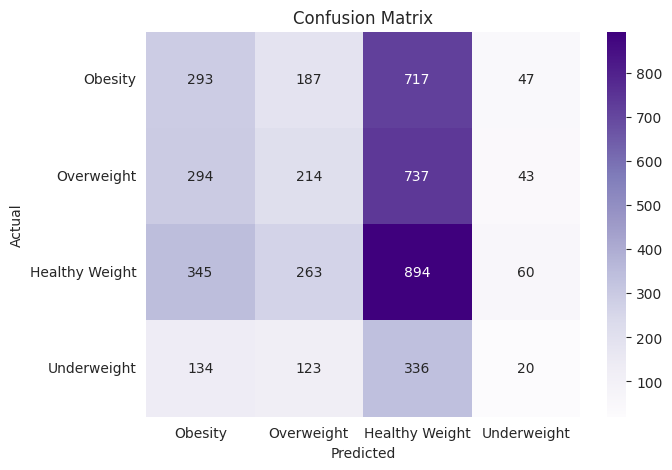

In [ ]:
# Get unique classes
classes = df_BMI['bmi_group'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Setting K to 5 as an example
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[814 406 289  53]
 [652 326 207  59]
 [680 323 241  44]
 [300 157 133  23]]
                precision    recall  f1-score   support

Healthy Weight       0.33      0.52      0.41      1562
       Obesity       0.27      0.26      0.27      1244
    Overweight       0.28      0.19      0.22      1288
   Underweight       0.13      0.04      0.06       613

      accuracy                           0.30      4707
     macro avg       0.25      0.25      0.24      4707
  weighted avg       0.27      0.30      0.27      4707



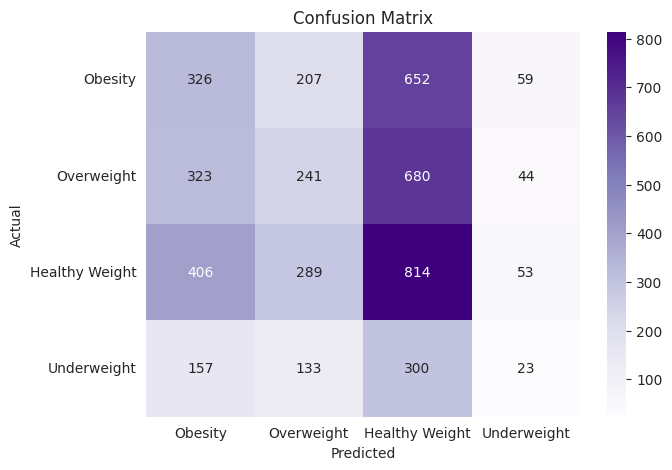

In [ ]:
# Get unique classes
classes = df_BMI['bmi_group'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=10)  # Setting K to 10 as an example
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[840 376 311  35]
 [673 320 231  20]
 [703 315 248  22]
 [335 132 133  13]]
                precision    recall  f1-score   support

Healthy Weight       0.33      0.54      0.41      1562
       Obesity       0.28      0.26      0.27      1244
    Overweight       0.27      0.19      0.22      1288
   Underweight       0.14      0.02      0.04       613

      accuracy                           0.30      4707
     macro avg       0.26      0.25      0.23      4707
  weighted avg       0.28      0.30      0.27      4707



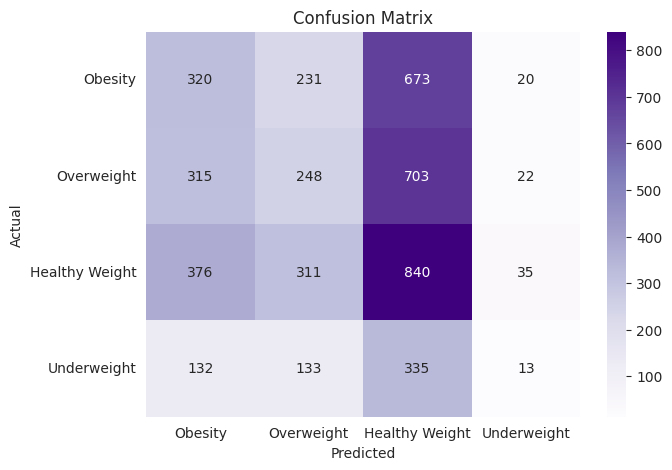

In [ ]:
# Get unique classes
classes = df_BMI['bmi_group'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
k_values = range(1, 10)

# A list to keep track of the error rates for each k value.
errors = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, y_train)

    # Predict the labels for the test set.
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

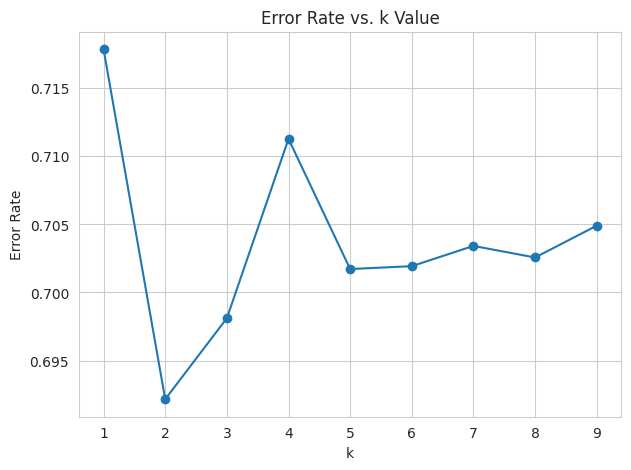

In [ ]:
# Plotting
# This visualization helps in understanding the relationship between k value and the error rate.
plt.figure(figsize=(7, 5))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

From the code above, we should select K to be equal to 5. In comparison to the other two values of K, when K is equal to 5, the model achieves the highest F1-score. F1-score is typically preferred in situations where the model encounters class imbalance, as it simultaneously addresses the issues of precision and recall.

 We can observe from the above graph that even though the model exhibits the lowest error rate when K is equal to 2, we believe that when K equals 2, the model may be too sensitive to noise in the data. Beyond K equals 5, the overall error rate of the model tends to flatten, this aligns with the results we obtained through calculating the F1 score.

In [ ]:
# Implement the model to the validation dataset.
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Setting K to 5 as an example
knn.fit(X_train, y_train)

# Predict using the validation data
y_pred = knn.predict(X_val)

# Evaluate the model
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[269 476   1   0]
 [233 419   3   0]
 [241 420   2   0]
 [106 184   0   0]]
                precision    recall  f1-score   support

Healthy Weight       0.32      0.36      0.34       746
       Obesity       0.28      0.64      0.39       655
    Overweight       0.33      0.00      0.01       663
   Underweight       0.00      0.00      0.00       290

      accuracy                           0.29      2354
     macro avg       0.23      0.25      0.18      2354
  weighted avg       0.27      0.29      0.22      2354



We can observe that both the F1-score and accuracy are relatively close to the results of the test dataset, despite their values being relatively small.

Simultaneously, within the validation dataset, no data points were classified into the 'Underweight' category. This may be attributed to the significantly smaller sample size of this category compared to the other three. There might not be a sufficient amount of data available for a meaningful analysis of this category. In the future, it might be worth considering a separate analysis for this category.

### **Some additional thoughts:**
Given our group's continuous interest in the impact of calorie intake on the body, and assuming a positive relationship between calorie intake and BMI, we are contemplating whether it is feasible to employ K-Means clustering to categorize calorie intake into different groups.

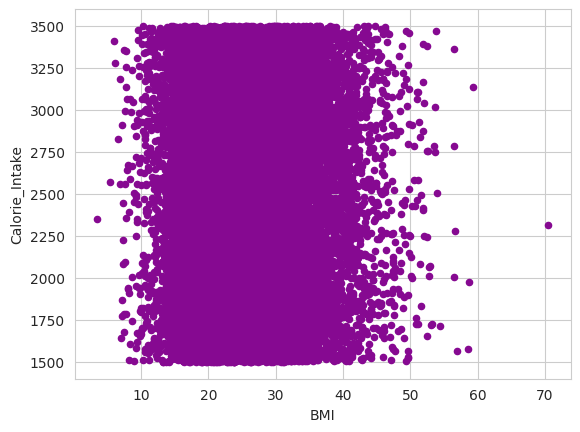

In [ ]:
features = ['BMI', 'Calorie_Intake']
df_BMI[features].plot.scatter(x=features[0], y=features[1], color='#860991')
plt.show()

However, based on the above graph, it is challenging to discern distinct groups, as the data appears to be randomly scattered. Therefore, we believe that employing K-Means may not be particularly effective in separating the groups. Hence, we should remain committed to using the K-Nearest Neighbors (KNN) method for analysis.

**LUNG CANCER DATASET ANALYSIS**

In [ ]:
df_lung.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


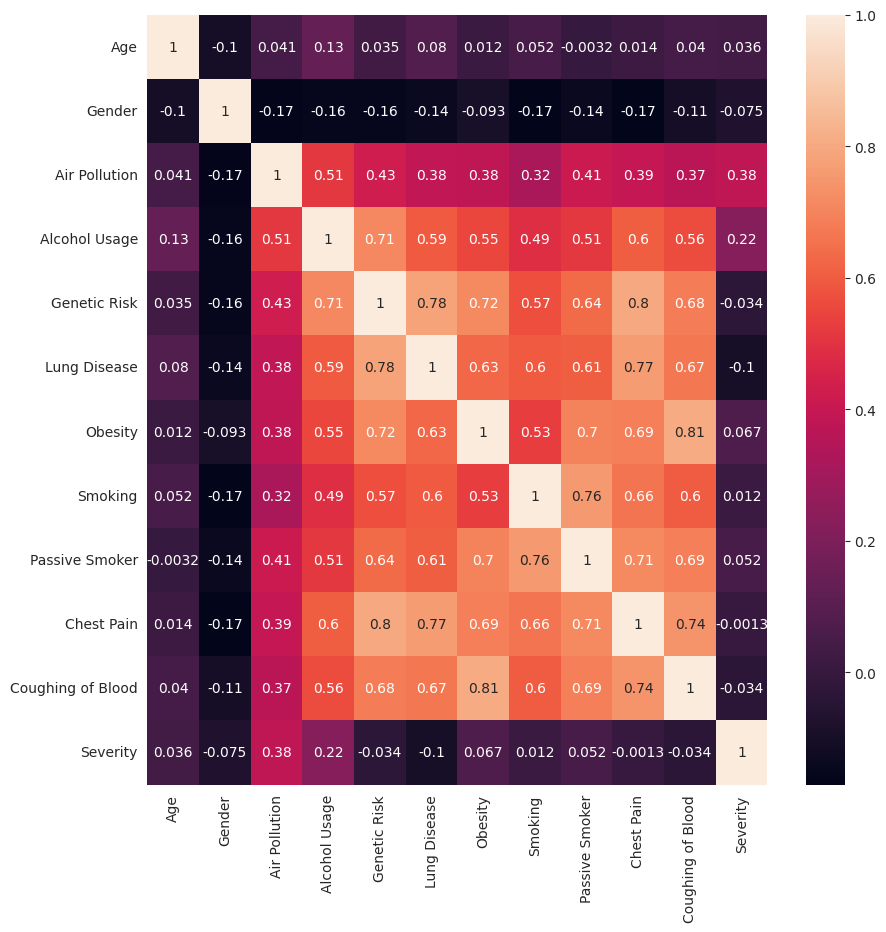

In [ ]:
# We want to check the correlation between 2 different features in lung cancer dataset
correlation = df_lung.corr()
seaborn.heatmap (correlation, annot = True)
plt.gcf().set_size_inches(10, 10)

In [ ]:
### Lung Cancer Risk Factors from Tikur Ambesa Hospital
# Here, Dependent variable is Severity and rest of the variables are independent
# variables. And we do not need encoding because there numerical input and output
# variables.

# Check for missing values in the dataset, no missing value is found here.
print(df_lung.isna().sum())

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64


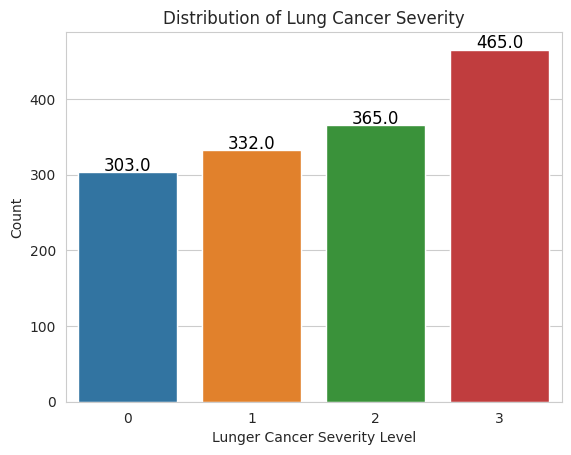

Number of unique categories in the outcome (0=Mild to 3=Critical): 4


In [ ]:
#Creating an ordinal logistic regression function for the lung cancer dataset

##First, we need to see how many factor levels severity has:

###Distribution of lung cancer severity amongst patients from Tikur Ambesa hospital
###Follow a normal distribution
###Set the style for seaborn
sns.set_style('whitegrid')

###Create a histogram
ax = sns.countplot(data=df_lung, x='Severity')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2.,
    p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

sns.countplot(data=df_lung, x='Severity')
plt.xlabel('Lunger Cancer Severity Level')
plt.ylabel('Count')
plt.title('Distribution of Lung Cancer Severity')
plt.show()

num_categories_outcome = df_lung['Severity'].nunique()
print("Number of unique categories in the outcome (0=Mild to 3=Critical):", num_categories_outcome)

In [ ]:
df_lung.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


Now we are going to conduct a likelihood ratio test to determine if the inclusion of the interaction term has an impact on the goodness of fit of the model.

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

#Creating an interaction term between 'Age' and 'Smoking'
df_lung['Age_Smoking_interaction'] = df_lung['Age'] * df_lung['Smoking']

#Looking at model summary of full model (with interaction term)
mod_log_full = OrderedModel(df_lung['Severity'],
                        df_lung[['Smoking','Age','Air Pollution','Passive Smoker','Lung Disease','Gender','Coughing of Blood','Age_Smoking_interaction']],
                        distr='logit')

reg_log_full = mod_log_full.fit(method='bfgs', disp=False)
reg_log_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:               Severity   Log-Likelihood:                -1805.2
Model:                   OrderedModel   AIC:                             3632.
Method:            Maximum Likelihood   BIC:                             3691.
Date:                Mon, 25 Sep 2023                                         
Time:                        16:10:58                                         
No. Observations:                1465                                         
Df Residuals:                    1454                                         
Df Model:                           8                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Smoking                     0.2726      0.073      3.716      0.000       0.129       0.416
Age                         0.0353      0.008      4.463      0.000       0.020       0.051
Air Pollution               0.4986      0.030     16.516      0.000       0.439       0.558
Passive Smoker              0.0833      0.042      2.005      0.045       0.002       0.165
Lung Disease               -0.4233      0.042    -10.095      0.000      -0.506      -0.341
Gender                     -0.0779      0.104     -0.747      0.455      -0.282       0.127
Coughing of Blood          -0.0794      0.031     -2.564      0.010      -0.140      -0.019
Age_Smoking_interaction    -0.0067      0.002     -4.258      0.000      -0.010      -0.004
0/1                        -0.0374      0.340     -0.110      0.912      -0.704       0.630
1/2                         0.2464      0.051      4.788      0.000       0.146       0.347
2/3                         0.2717      0.048      5.704      0.000       0.178       0.365
===========================================================================================
"""

In [ ]:
#Looking at model summary of restricted model (without interaction term)
mod_log_restricted = OrderedModel(df_lung['Severity'],
                        df_lung[['Smoking','Age','Air Pollution','Passive Smoker','Lung Disease','Gender','Coughing of Blood']],
                        distr='logit')

reg_log_null = mod_log_restricted.fit(method='bfgs', disp=False)
reg_log_null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:               Severity   Log-Likelihood:                -1814.3
Model:                   OrderedModel   AIC:                             3649.
Method:            Maximum Likelihood   BIC:                             3701.
Date:                Mon, 25 Sep 2023                                         
Time:                        16:10:58                                         
No. Observations:                1465                                         
Df Residuals:                    1455                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Smoking              -0.0021      0.035     -0.061      0.951      -0.071       0.067
Age                   0.0069      0.004      1.665      0.096      -0.001       0.015
Air Pollution         0.5042      0.030     16.789      0.000       0.445       0.563
Passive Smoker        0.0785      0.042      1.883      0.060      -0.003       0.160
Lung Disease         -0.3933      0.041     -9.617      0.000      -0.474      -0.313
Gender               -0.0283      0.104     -0.274      0.784      -0.231       0.175
Coughing of Blood    -0.0728      0.031     -2.375      0.018      -0.133      -0.013
0/1                  -0.9386      0.266     -3.525      0.000      -1.460      -0.417
1/2                   0.2381      0.052      4.622      0.000       0.137       0.339
2/3                   0.2611      0.048      5.486      0.000       0.168       0.354
=====================================================================================
"""

In [ ]:
#Extracting log-likelihood values from the model summaries
log_likelihood_full = reg_log_full.llf
log_likelihood_restricted = reg_log_null.llf

#Calculating likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(log_likelihood_restricted-log_likelihood_full)

#Calculating degrees of freedom
df = (reg_log_full.df_model + 1) - (reg_log_null.df_model + 1)  # +1 for the intercept term in each model

#Calculating p-value of test statistic
p_value = scipy.stats.chi2.sf(LR_statistic, df)

print("Likelihood Ratio Test Statistic:", LR_statistic)
print("p-value:", p_value)
print("Therefore, the full model fits the data significantly better than the restricted model")

Likelihood Ratio Test Statistic: 18.198319628964327
p-value: 1.990543812048253e-05
Therefore, the full model fits the data significantly better than the restricted model
